In [1]:
# Important Imports

import h5py as hf
import numpy as np
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import axes3d
from scipy.linalg import lstsq

In [2]:
# Reading hdf5 files

mwa = hf.File('cutout_123775.hdf5', 'r')

In [3]:
# Fields in the file

mwa.keys()

<KeysViewHDF5 ['Header', 'PartType0', 'PartType1', 'PartType4', 'PartType5']>

In [4]:
# Selecting PartType0 (Gas Particles) 

gas = mwa['PartType0']

In [5]:
# Properties of the particle

gas.keys()

<KeysViewHDF5 ['Coordinates', 'Density', 'ElectronAbundance', 'GFM_AGNRadiation', 'GFM_CoolingRate', 'GFM_Metallicity', 'GFM_WindDMVelDisp', 'InternalEnergy', 'Masses', 'NeutralHydrogenAbundance', 'NumTracers', 'ParticleIDs', 'Potential', 'SmoothingLength', 'StarFormationRate', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities', 'Volume']>

In [6]:
# Particle Masses

m = gas['Masses']

In [7]:
# Particle Coordinates

xyzg = gas['Coordinates']

# Converting to the center of mass frame

xg = xyzg[:,0]
yg = xyzg[:,1]
zg = xyzg[:,2]

cxg, cyg, czg = xg - np.average(xg, weights=m), yg - np.average(yg, weights=m), zg - np.average(zg, weights=m)

In [8]:
# Calculating the distance of each particle from the COM

dist = np.sqrt(cxg**2 + cyg**2 + czg**2)

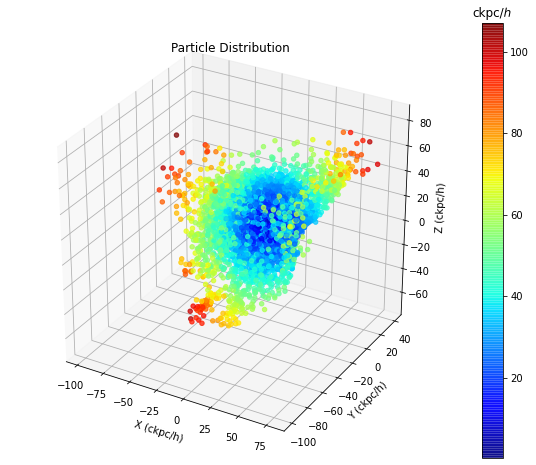

In [9]:
# Plotting Particle coordinate data

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1,projection='3d')
c = ax.scatter(cxg, cyg, czg, c=dist, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title(r'ckpc/ℎ')

ax.set_zlabel('Z (ckpc/h)')
ax.set_ylabel('Y (ckpc/h)')
ax.set_xlabel('X (ckpc/h)')
ax.set_title('Particle Distribution')

# ax.view_init(45, 45)

plot.show()

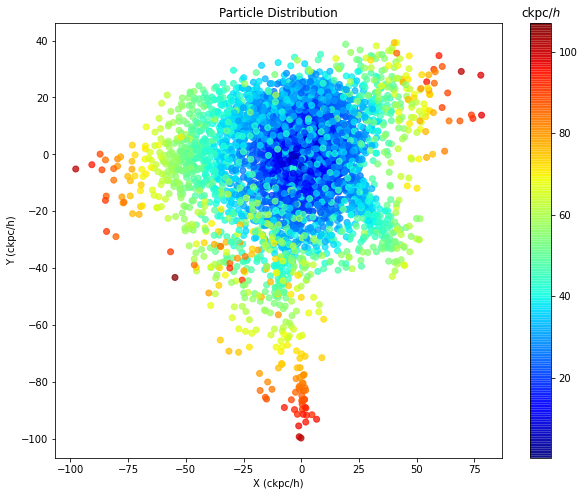

In [10]:
# Plotting Particle coordinate data (XY Projection)

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
c = ax.scatter(cxg, cyg, c=dist, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title(r'ckpc/ℎ')

ax.set_ylabel('Y (ckpc/h)')
ax.set_xlabel('X (ckpc/h)')
ax.set_title('Particle Distribution')

plot.show()

In [11]:
#Converting to spherical coordinates

r = np.sqrt(cxg**2 + cyg**2 + czg**2)

theta = np.arccos(czg/r)

phi = np.where(cyg < 0, (2*np.pi - np.arccos(cxg/(r*np.sin(theta)))), np.arccos(cxg/(r*np.sin(theta))))

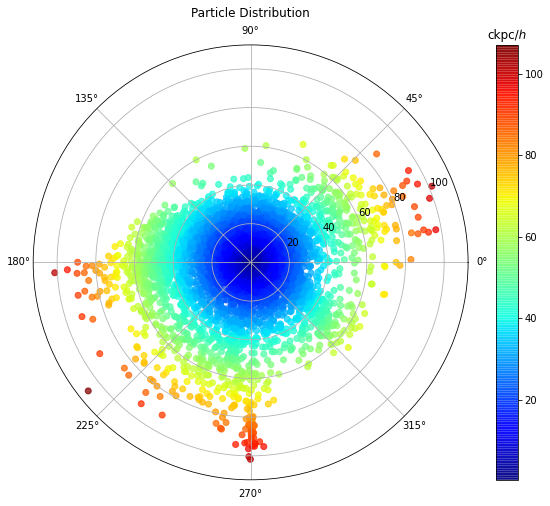

In [12]:
# Plotting Particle coordinate data (Polar Plot)

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(phi, r, c=dist, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title(r'ckpc/ℎ')

ax.set_title('Particle Distribution')

plot.show()

In [13]:
# Particle Density data

den = gas['Density']

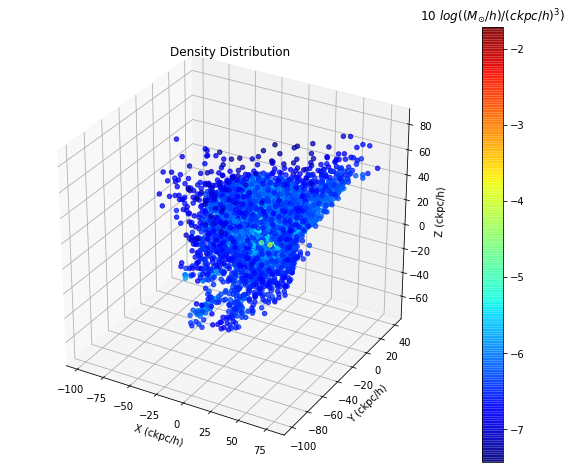

In [14]:
# Plotting Particle Density data

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
c = ax.scatter(cxg, cyg, czg, c=np.log10(den), cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title(r'10 $log((M_{⊙}/ℎ)/(ckpc/ℎ)^{3})$')

ax.set_zlabel('Z (ckpc/h)')
ax.set_ylabel('Y (ckpc/h)')
ax.set_xlabel('X (ckpc/h)')
ax.set_title('Density Distribution')

# ax.view_init(45, 45)

plot.show()

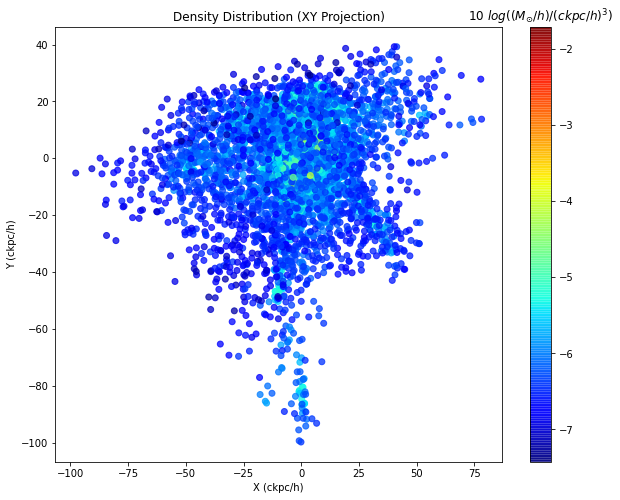

In [15]:
# Plotting Particle Density data (XY Projection)

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
c = ax.scatter(cxg, cyg, c=np.log10(den), cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title(r'10 $log((M_{⊙}/ℎ)/(ckpc/ℎ)^{3})$')

ax.set_ylabel('Y (ckpc/h)')
ax.set_xlabel('X (ckpc/h)')
ax.set_title('Density Distribution (XY Projection)')

plot.show()

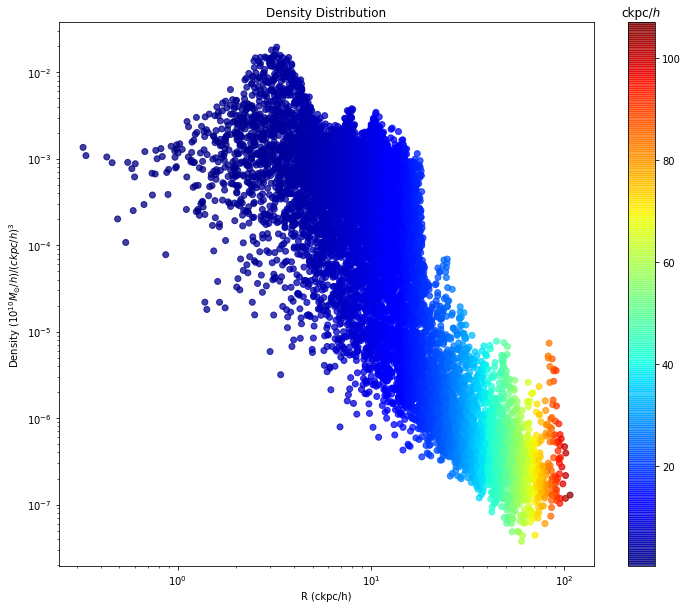

In [66]:
# Plotting Particle Density v Radius data

fig = plot.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)
c = ax.scatter(r, den, c=dist, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title('ckpc/ℎ')

ax.set_ylabel(r'Density $(10^{10}M_{\odot}/ℎ)/(ckpc/ℎ)^{3}$')
ax.set_xlabel('R (ckpc/h)')
ax.set_title('Density Distribution')

plot.xscale('log')
plot.yscale('log')

plot.show()

In [17]:
# Particle velocities {Scale factor (a) = 1}
 
velg = gas['Velocities']

vxg = velg[:,0]
vyg = velg[:,1]
vzg = velg[:,2]

# Velocities in COM Frame

cvx = vxg - np.average(vxg, weights=m)
cvy = vyg - np.average(vyg, weights=m)
cvz = vzg - np.average(vzg, weights=m)

cvelg = np.array([cvx, cvy, cvz]).transpose()

netvelg = np.sqrt(cvx**2 + cvy**2 + cvz**2)

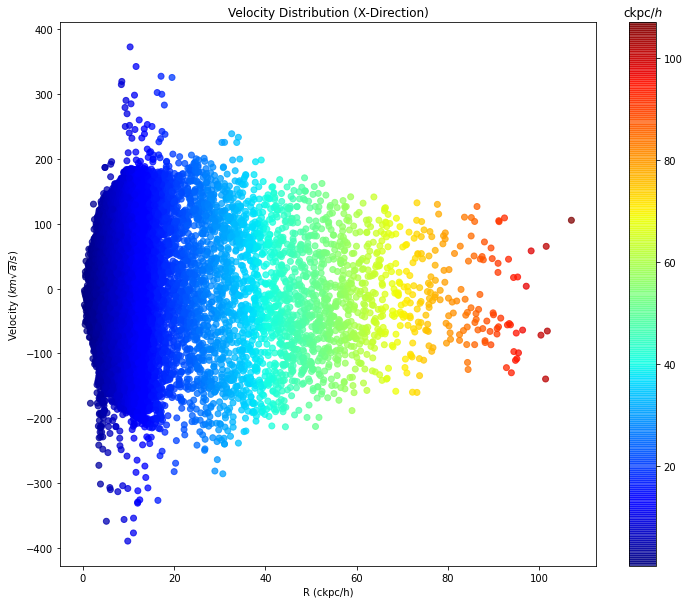

In [18]:
# Plotting Particle Velocity data (X-Direction)

fig = plot.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)
c = ax.scatter(r, cvx, c=dist, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title('ckpc/ℎ')

ax.set_ylabel(r'Velocity $(km\sqrt{a}/s)$')
ax.set_xlabel('R (ckpc/h)')
ax.set_title('Velocity Distribution (X-Direction)')

plot.show()

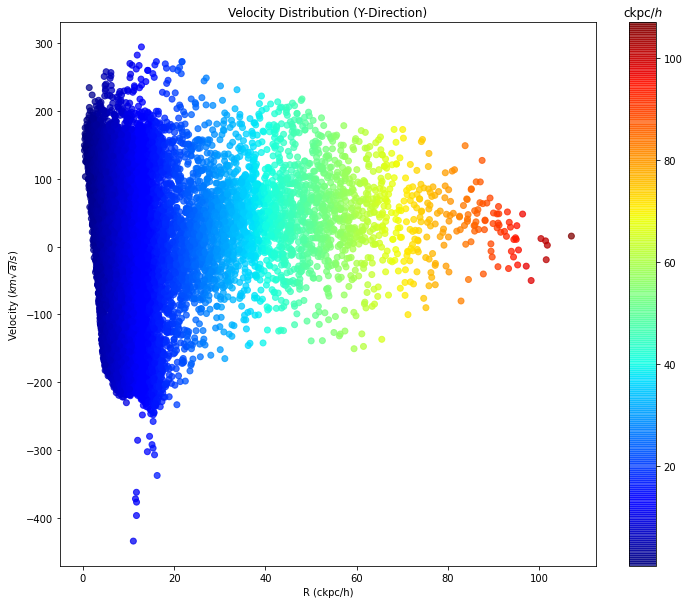

In [19]:
# Plotting Particle Velocity data (Y-Direction)

fig = plot.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)
c = ax.scatter(r, cvy, c=dist, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title('ckpc/ℎ')

ax.set_ylabel(r'Velocity $(km\sqrt{a}/s)$')
ax.set_xlabel('R (ckpc/h)')
ax.set_title('Velocity Distribution (Y-Direction)')

plot.show()

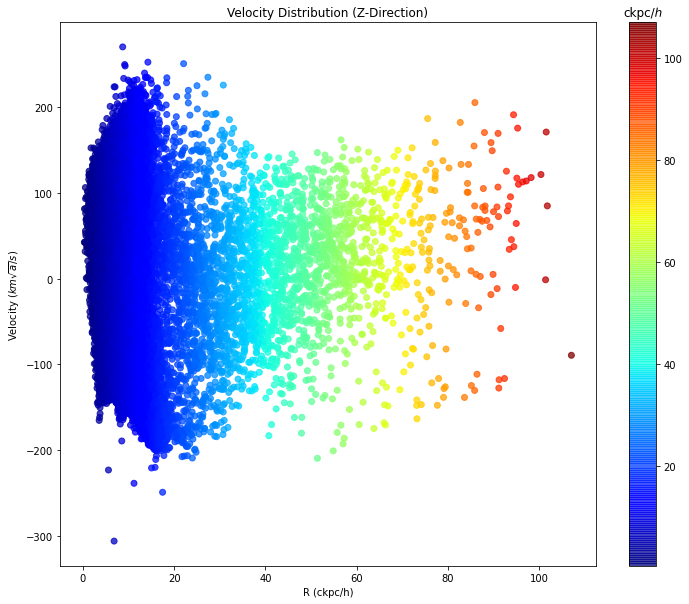

In [20]:
# Plotting Particle Velocity data (Z-Direction)

fig = plot.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)
c = ax.scatter(r, cvz, c=dist, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title('ckpc/ℎ')

ax.set_ylabel(r'Velocity $(km\sqrt{a}/s)$')
ax.set_xlabel('R (ckpc/h)')
ax.set_title('Velocity Distribution (Z-Direction)')

plot.show()

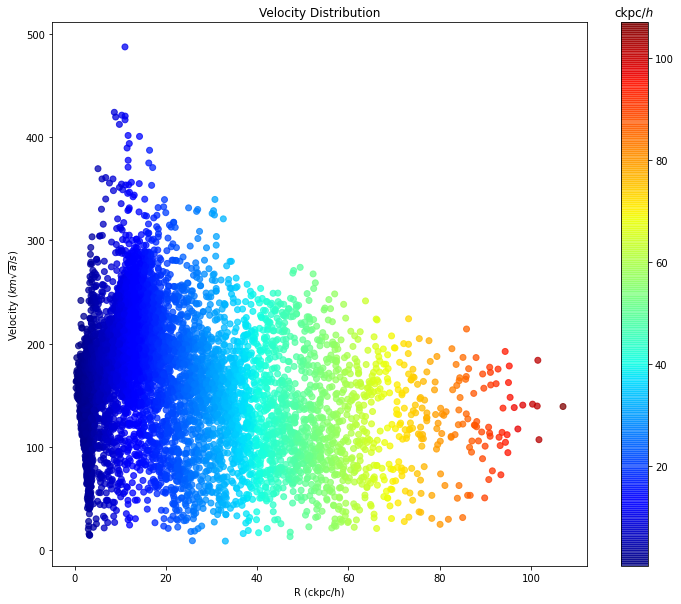

In [21]:
# Plotting Particle Net Velocity data

fig = plot.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)
c = ax.scatter(r, netvelg, c=dist, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title('ckpc/ℎ')

ax.set_ylabel(r'Velocity $(km\sqrt{a}/s)$')
ax.set_xlabel('R (ckpc/h)')
ax.set_title('Velocity Distribution')

plot.show()

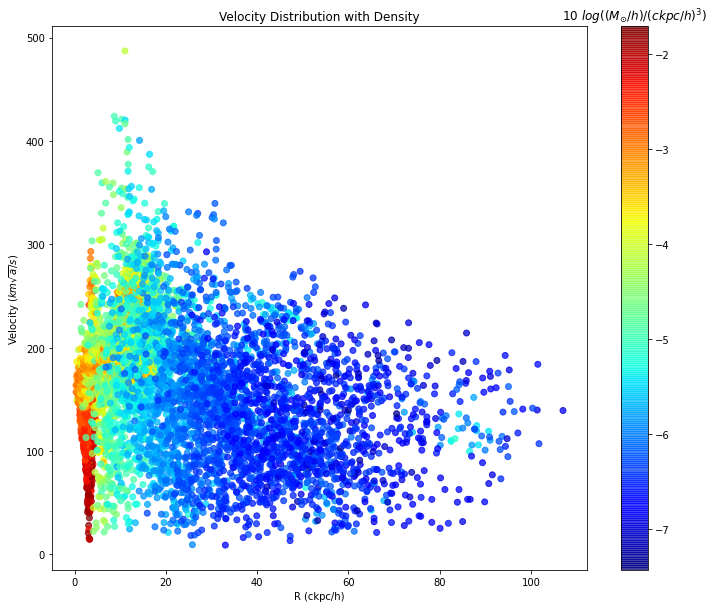

In [22]:
# Plotting Net Velocity vs Radius with Density

fig = plot.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)
c = ax.scatter(r, netvelg, c=np.log10(den), cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title(r'10 $log((M_{⊙}/ℎ)/(ckpc/ℎ)^{3})$')

ax.set_ylabel(r'Velocity $(km\sqrt{a}/s)$')
ax.set_xlabel('R (ckpc/h)')
ax.set_title('Velocity Distribution with Density')

plot.show()

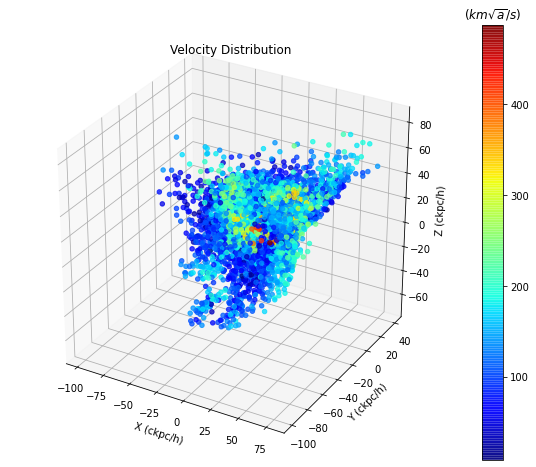

In [23]:
# Plotting Particle Net Velocities

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
c = ax.scatter(cxg, cyg, czg, c=netvelg, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title(r'$(km\sqrt{a}/s)$')

ax.set_zlabel('Z (ckpc/h)')
ax.set_ylabel('Y (ckpc/h)')
ax.set_xlabel('X (ckpc/h)')
ax.set_title('Velocity Distribution')

# ax.view_init(45, 45)

plot.show()

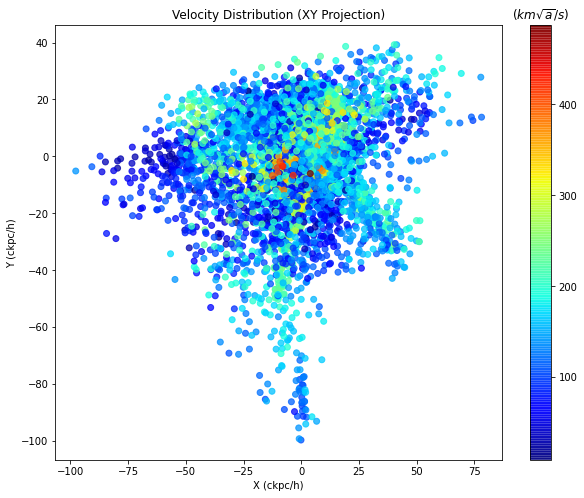

In [24]:
# Plotting Particle Net Velocity (XY Projection)

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c = ax.scatter(cxg, cyg, c=netvelg, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title(r'$(km\sqrt{a}/s)$')

ax.set_ylabel('Y (ckpc/h)')
ax.set_xlabel('X (ckpc/h)')
ax.set_title('Velocity Distribution (XY Projection)')

plot.show()

In [25]:
# Converting velocities to spherical coordinates

# M3D - Convertion matrix to convert spherical unit vectors to cartesian unit vectors

M3D = np.array([[np.sin(theta[0])*np.cos(phi[0]),np.cos(theta[0])*np.cos(phi[0]),-np.sin(phi[0])],
         [np.sin(theta[0])*np.sin(phi[0]),np.cos(theta[0])*np.sin(phi[0]), np.cos(phi[0])],
         [np.cos(theta[0]),-np.sin(theta[0]), 0]])

for i in range(1,len(phi)):
    
    array = np.array([[np.sin(theta[i])*np.cos(phi[i]),np.cos(theta[i])*np.cos(phi[i]),-np.sin(phi[i])],
         [np.sin(theta[i])*np.sin(phi[i]),np.cos(theta[i])*np.sin(phi[i]), np.cos(phi[i])],
         [np.cos(theta[i]),-np.sin(theta[i]), 0]])
     
    M3D = np.append(M3D,array,axis=0)
    
M3D = np.reshape(M3D,(len(phi),3,3))
    
print(M3D.shape)

(11153, 3, 3)


In [26]:
#Converting a velocity matrix into spherical coordinates

svelg = np.matmul(cvelg[0],M3D[0])

for i in range(1,len(phi)):
    
    array = np.matmul(cvelg[i],M3D[i])
    
    svelg = np.append(svelg,array,axis=0)
    
svelg = np.reshape(svelg,(len(phi),3))

print(svelg.shape)

(11153, 3)


In [27]:
# Particle Spherical velocities

vrg = svelg[:,0]   # Radial Velocity
vtg = svelg[:,1]   # Theta Velocity
vpg = svelg[:,2]   # Phi Velocity

In [28]:
# Calculating Velocity Dispersion

# Dividing the Radius into bins

n = 30
_, bins = np.histogram(r,bins=n)

# Calculating the Standard deviation of the Radial velocities in each radial bin

val = np.zeros(n)

for i in range(1,n):
    
    val[i] = np.std(vrg[(r >= bins[i]) * (r < bins[i+1])])

# Clipping the data

val = val[:-1]
val[0] = 1
bins = bins[1:-1]

/home/aakash/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/aakash/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/aakash/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


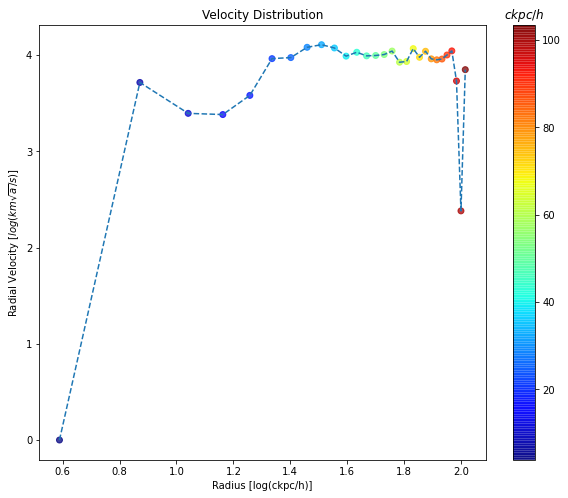

In [29]:
# Plotting Radial Velocity Dispersion vs Radius 

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c = ax.scatter(np.log10(bins), np.log10(np.square(val)), c=bins, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title(r'$ckpc/h$')

ax.set_ylabel(r'Radial Velocity $[log(km\sqrt{a}/s)]$')
ax.set_xlabel('Radius [log(ckpc/h)]')
ax.set_title('Velocity Distribution')

# ax.view_init(45, 45)
plot.plot(np.log10(bins), np.log10(np.square(val)), '--')

plot.show()

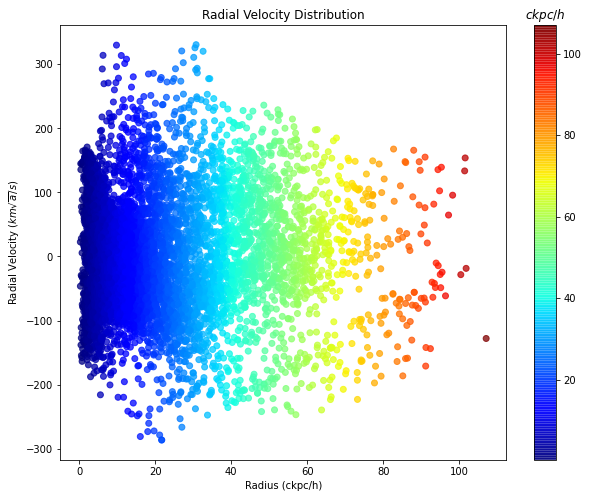

In [30]:
# Plotting Particle Radial Velocity vs Radius

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c = ax.scatter(r, vrg, c=r, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title(r'$ckpc/h$')

ax.set_ylabel(r'Radial Velocity $(km\sqrt{a}/s)$')
ax.set_xlabel('Radius (ckpc/h)')
ax.set_title('Radial Velocity Distribution')

# ax.view_init(45, 45)


plot.show()

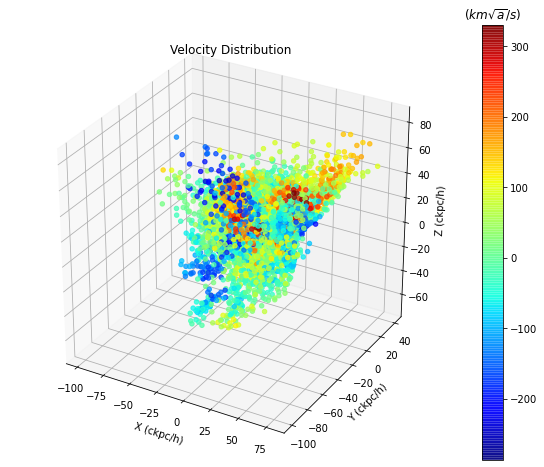

In [31]:
# Plotting Particle Radial Velocity 

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
c = ax.scatter(cxg, cyg, czg, c=vrg, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title(r'$(km\sqrt{a}/s)$')

ax.set_zlabel('Z (ckpc/h)')
ax.set_ylabel('Y (ckpc/h)')
ax.set_xlabel('X (ckpc/h)')
ax.set_title('Velocity Distribution')

# ax.view_init(45, 45)

plot.show()

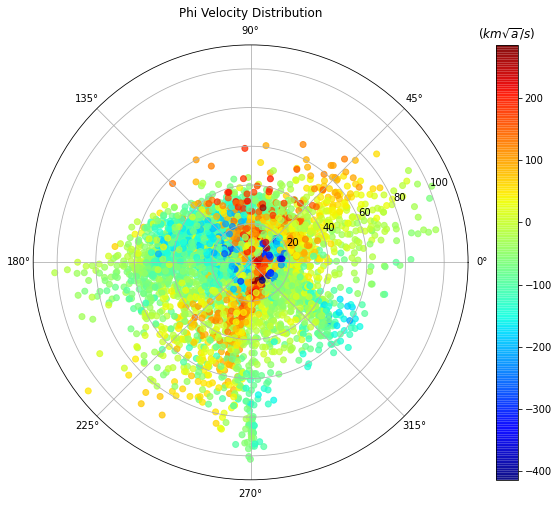

In [32]:
# Plotting Particle Phi Velocity (Polar plot)

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(phi, r, c=vpg, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title(r'$(km\sqrt{a}/s)$')

ax.set_title('Phi Velocity Distribution')

# ax.view_init(45, 45)

plot.show()

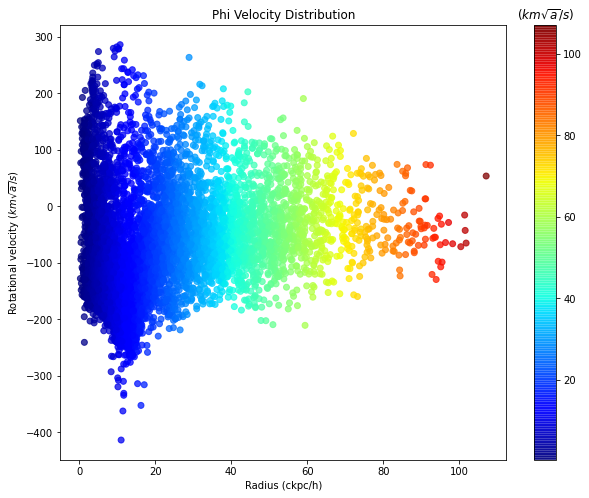

In [33]:
# Plotting Particle Phi Velocity 

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c = ax.scatter(r, vpg, c=r, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title(r'$(km\sqrt{a}/s)$')

ax.set_ylabel(r'Rotational velocity $(km\sqrt{a}/s)$')
ax.set_xlabel('Radius (ckpc/h)')
ax.set_title('Phi Velocity Distribution')

# ax.view_init(45, 45)

plot.show()

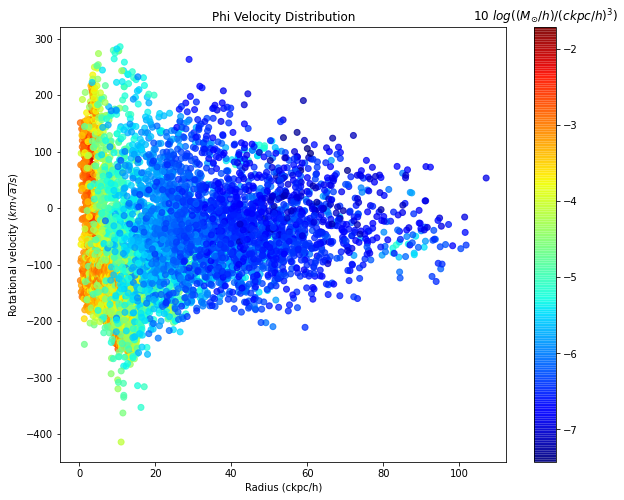

In [34]:
# Plotting Particle Phi Velocity with Density

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c = ax.scatter(r, vpg, c=np.log10(den), cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title(r'10 $log((M_{⊙}/ℎ)/(ckpc/ℎ)^{3})$')

ax.set_ylabel(r'Rotational velocity $(km\sqrt{a}/s)$')
ax.set_xlabel('Radius (ckpc/h)')
ax.set_title('Phi Velocity Distribution')

# ax.view_init(45, 45)

plot.show()

In [35]:
# Particle Internal Energies

ie = gas['InternalEnergy']

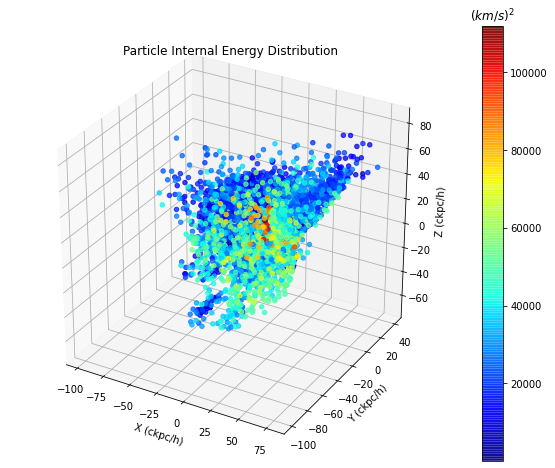

In [36]:
# Plotting Particle Internal Energy data

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1,projection='3d')
c = ax.scatter(cxg, cyg, czg, c=ie, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title(r'$(km/s)^{2}$')

ax.set_zlabel('Z (ckpc/h)')
ax.set_ylabel('Y (ckpc/h)')
ax.set_xlabel('X (ckpc/h)')
ax.set_title('Particle Internal Energy Distribution')

# ax.view_init(45, 45)

plot.show()

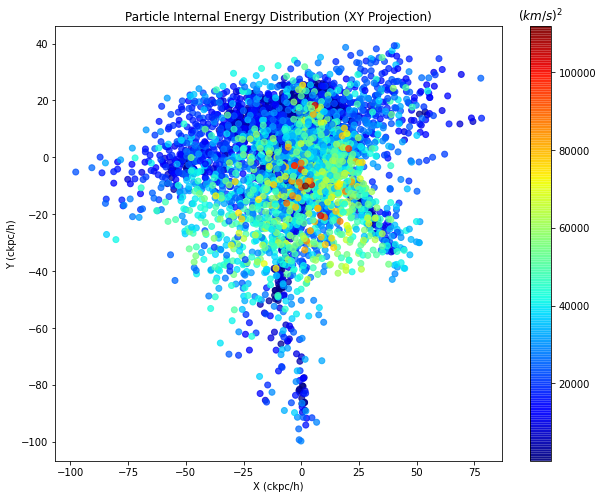

In [37]:
# Plotting Particle coordinate data (XY Projection)

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
c = ax.scatter(cxg, cyg, c=ie, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title(r'$(km/s)^{2}$')

ax.set_ylabel('Y (ckpc/h)')
ax.set_xlabel('X (ckpc/h)')
ax.set_title('Particle Internal Energy Distribution (XY Projection)')

plot.show()

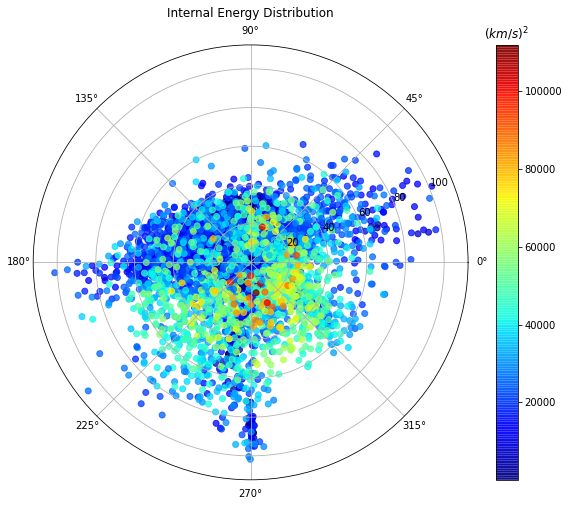

In [38]:
# Plotting Internal Energy data (Polar plot)

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1, projection='polar')
c = ax.scatter(phi, r, c=ie, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title(r'$(km/s)^{2}$')

ax.set_title('Internal Energy Distribution')

plot.show()

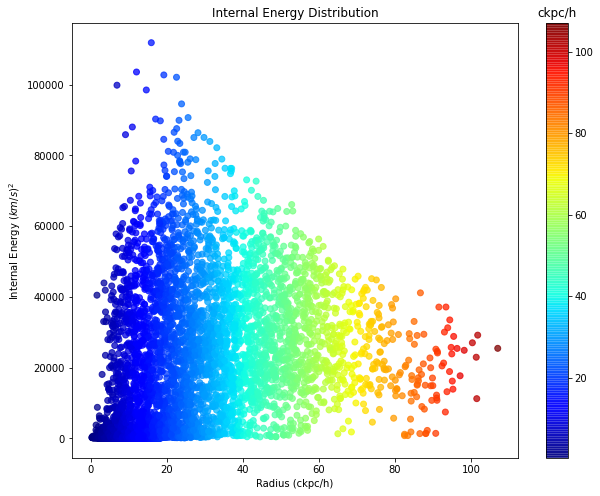

In [39]:
# Plotting Internal Energy vs Radius

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
c = ax.scatter(r, ie, c=r, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title('ckpc/h')

ax.set_ylabel(r'Internal Energy $(km/s)^{2}$')
ax.set_xlabel('Radius (ckpc/h)')
ax.set_title('Internal Energy Distribution')

plot.show()

In [40]:
# Particle Potential Energies

pot = gas['Potential']

In [41]:
# Converting to the center of potential frame

xg = xyzg[:,0]
yg = xyzg[:,1]
zg = xyzg[:,2]

cxg, cyg, czg = xg - np.average(xg, weights=pot), yg - np.average(yg, weights=pot), zg - np.average(zg, weights=pot)

In [42]:
# Calculating the distance of each particle from the Center of Potential

dist = np.sqrt(cxg**2 + cyg**2 + czg**2)

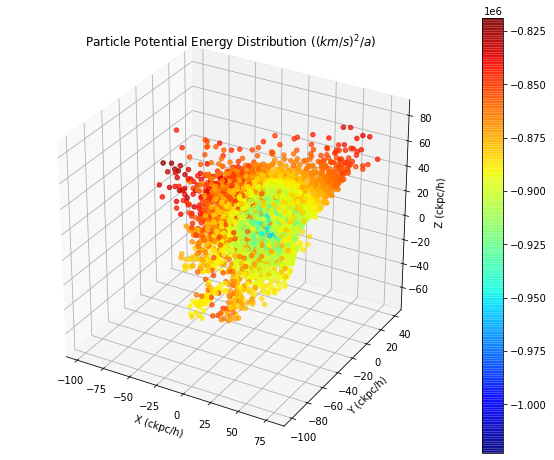

In [43]:
# Plotting Particle Potential energy data

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1,projection='3d')
c = ax.scatter(cxg, cyg, czg, c=pot, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)

ax.set_zlabel('Z (ckpc/h)')
ax.set_ylabel('Y (ckpc/h)')
ax.set_xlabel('X (ckpc/h)')
ax.set_title(r'Particle Potential Energy Distribution $((km/s)^{2}/a)$')

# ax.view_init(45, 45)

plot.show()

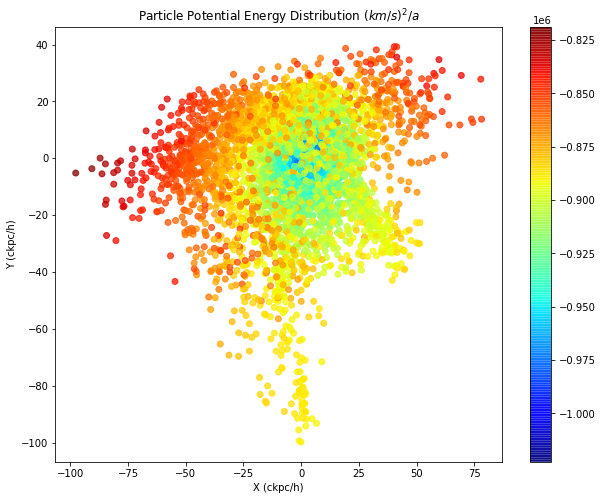

In [44]:
# Plotting Particle Potential energy data (XY-Projection)

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c = ax.scatter(cxg, cyg, c=pot, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)

ax.set_ylabel('Y (ckpc/h)')
ax.set_xlabel('X (ckpc/h)')
ax.set_title(r'Particle Potential Energy Distribution $(km/s)^{2}/a$')

plot.show()

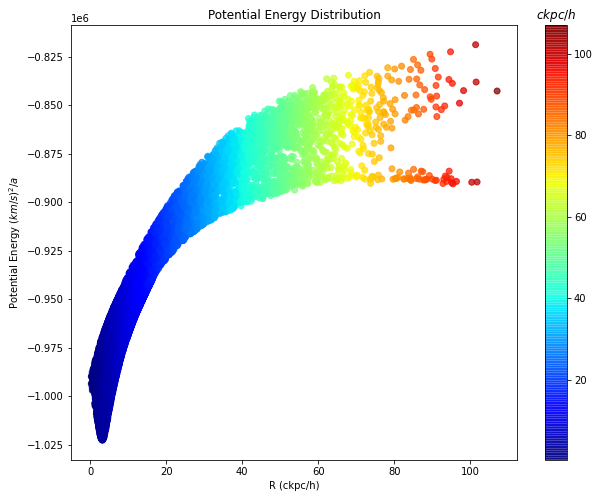

In [45]:
# Plotting Particle Potential energy vs Radius Data

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c = ax.scatter(r, pot, c=r, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title(r'$ckpc/h$')

ax.set_ylabel(r'Potential Energy $(km/s)^{2}/a$')
ax.set_xlabel('R (ckpc/h)')
ax.set_title('Potential Energy Distribution')
plot.show()

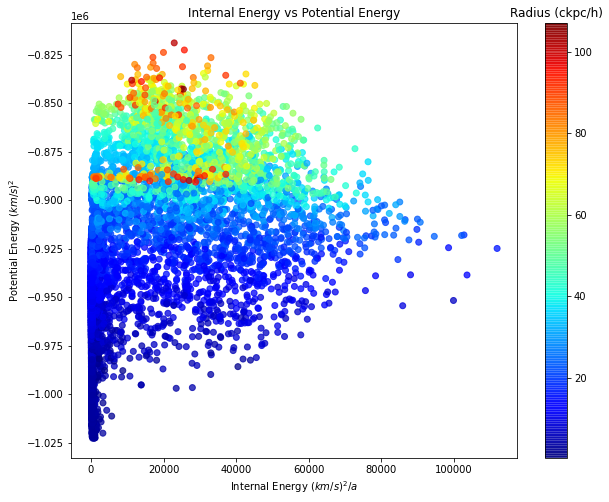

In [46]:
# Plotting Internal Energy with Potential Energy data

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
c = ax.scatter(ie, pot, c=r, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title('Radius (ckpc/h)')

ax.set_ylabel(r'Potential Energy $(km/s)^{2}$')
ax.set_xlabel(r'Internal Energy $(km/s)^{2}/a$')
ax.set_title('Internal Energy vs Potential Energy')

plot.show()

In [47]:
# Converting to the COM frame

xg = xyzg[:,0]
yg = xyzg[:,1]
zg = xyzg[:,2]

cxg, cyg, czg = xg - np.average(xg, weights=m), yg - np.average(yg, weights=m), zg - np.average(zg, weights=m)

# Calculating the distance of each particle from the COM

dist = np.sqrt(cxg**2 + cyg**2 + czg**2)

In [48]:
# Best fit plane through the particles

M = np.ones((cxg.shape[0],3))
M[:,0] = cxg
M[:,1] = cyg
print(M.shape)
print(M)

(11153, 3)
[[  2.2248624    1.36067041   1.        ]
 [  2.16795524   1.45910643   1.        ]
 [  2.14878078   1.31782058   1.        ]
 ...
 [-44.10189198 -12.78741678   1.        ]
 [-21.43604147 -62.95621313   1.        ]
 [-19.01509021 -36.7884672    1.        ]]


In [49]:
# Calcuting the Plane Coefficients (ax + by + c = z)

p, res, rnk, s = lstsq(M, czg)
# p = [a, b, c]

print(p)   # ax + by + c = z
a, b, c = p[0], p[1], p[2]

[-0.00474575  0.30202727  0.0598619 ]


In [50]:
# Best fit plane 

xx, yy = np.meshgrid(np.arange(-100,100), np.arange(-100,100))

z = (a * xx + b * yy + c)

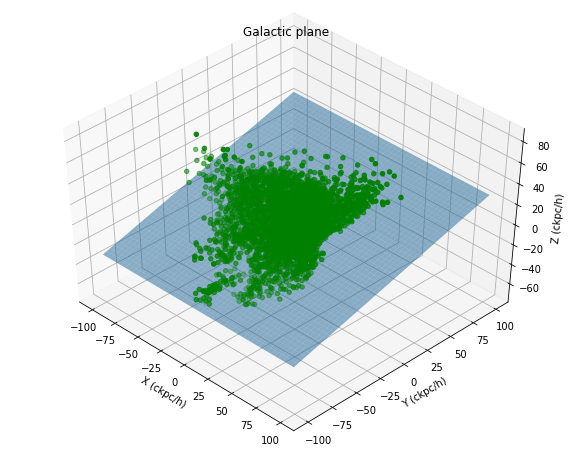

In [51]:
# Plotting the best fit plane 

fig = plot.figure(figsize=(10,8))

ax = fig.add_subplot(111,projection='3d')

# plotting the surface
ax.plot_surface(xx, yy, z, alpha=0.5)

# plotting the particles 
ax.scatter(cxg, cyg, czg, color='green')

ax.view_init(45, 315)

ax.set_zlabel('Z (ckpc/h)')
ax.set_ylabel('Y (ckpc/h)')
ax.set_xlabel('X (ckpc/h)')
ax.set_title('Galactic plane')

plot.show()

In [52]:
# Calculation the Phi Velocity along the Best fit plane
# Eqn of Plane: ax + by + c = z
# V_phi = V
# V_phi' = V_phi dot (-a, -b, 1)

vpg = vpg*(1/np.sqrt(a**2 + b**2 + 1))

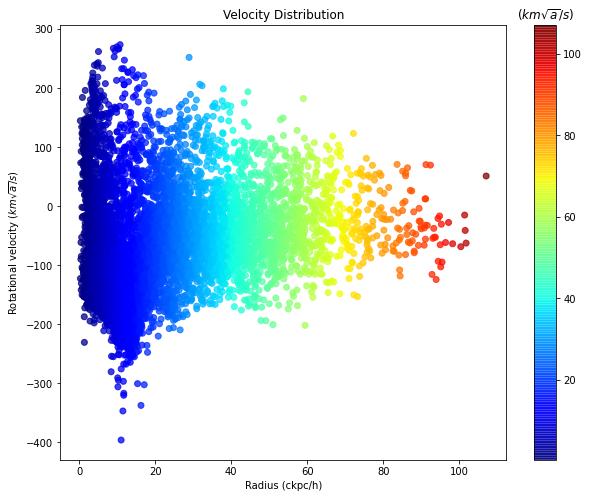

In [53]:
# Plotting Rotational Velocity 

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c = ax.scatter(r, vpg, c=r, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title(r'$(km\sqrt{a}/s)$')

ax.set_ylabel(r'Rotational velocity $(km\sqrt{a}/s)$')
ax.set_xlabel('Radius (ckpc/h)')
ax.set_title('Velocity Distribution')

# ax.view_init(45, 45)

plot.show()

In [54]:
# Calculating basis vectors of the plane

e1 = np.array([-a, b, 0])/np.linalg.norm([-a, b, 0])
e3 = np.array([-a, -b, 1])/np.linalg.norm([-a, -b, 1])
e2 = np.cross(e1, e3)/np.linalg.norm(np.cross(e1, e3))

M = np.array([e1, e2, e3])

In [55]:
# Particle velocities {Scale factor (a) = 1}
 
velg = gas['Velocities']

vxg = velg[:,0]
vyg = velg[:,1]
vzg = velg[:,2]

# Velocities in COM Frame

cvx = vxg - np.average(vxg, weights=m)
cvy = vyg - np.average(vyg, weights=m)
cvz = vzg - np.average(vzg, weights=m)

cvelg = np.array([cvx, cvy, cvz]).transpose()

netvelg = np.sqrt(cvx**2 + cvy**2 + cvz**2)

In [56]:
# Converting the velocities into the new coordinate system
 
new_vel = np.matmul(cvelg[0], np.transpose(M))

for i in range(1, len(cvx)):
    
    array = np.matmul(cvelg[i], np.transpose(M))
    
    new_vel = np.append(new_vel, array, axis=0)
    
new_vel = np.reshape(new_vel,(len(cvx),3))

print(new_vel.shape)

(11153, 3)


In [57]:
# Converting velocities to spherical coordinates

# M3D - Convertion matrix to convert spherical unit vectors to cartesian unit vectors

M3D = np.array([[np.sin(theta[0])*np.cos(phi[0]),np.cos(theta[0])*np.cos(phi[0]),-np.sin(phi[0])],
         [np.sin(theta[0])*np.sin(phi[0]),np.cos(theta[0])*np.sin(phi[0]), np.cos(phi[0])],
         [np.cos(theta[0]),-np.sin(theta[0]), 0]])

for i in range(1,len(phi)):
    
    array = np.array([[np.sin(theta[i])*np.cos(phi[i]),np.cos(theta[i])*np.cos(phi[i]),-np.sin(phi[i])],
         [np.sin(theta[i])*np.sin(phi[i]),np.cos(theta[i])*np.sin(phi[i]), np.cos(phi[i])],
         [np.cos(theta[i]),-np.sin(theta[i]), 0]])
     
    M3D = np.append(M3D,array,axis=0)
    
M3D = np.reshape(M3D,(len(phi),3,3))
    
print(M3D.shape)

(11153, 3, 3)


In [58]:
#Converting a velocity matrix into spherical coordinates

svelg = np.matmul(new_vel[0], M3D[0])

for i in range(1,len(phi)):
    
    array = np.matmul(new_vel[i], M3D[i])
    
    svelg = np.append(svelg,array,axis=0)
    
svelg = np.reshape(svelg,(len(phi),3))

print(svelg.shape)

(11153, 3)


In [59]:
# Particle Spherical velocities

vrg = svelg[:,0]   # Radial Velocity
vtg = svelg[:,1]   # Theta Velocity
vpg = svelg[:,2]   # Phi Velocity

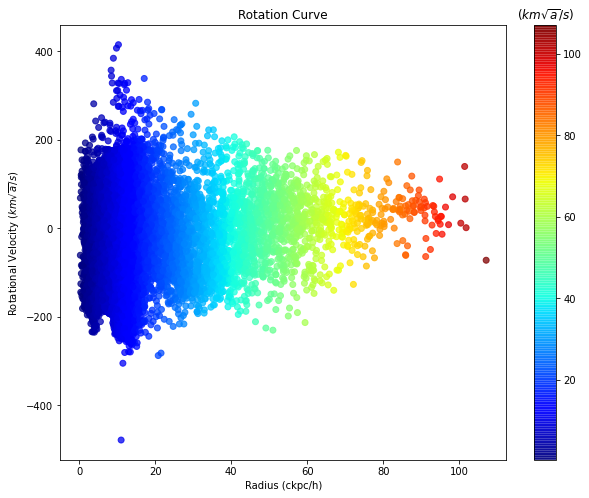

In [60]:
# Plotting Particle Phi Velocity in the New Coordinate system

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c = ax.scatter(r, vpg, c=r, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title(r'$(km\sqrt{a}/s)$')

ax.set_ylabel(r'Rotational Velocity $(km\sqrt{a}/s)$')
ax.set_xlabel('Radius (ckpc/h)')
ax.set_title('Rotation Curve')

# ax.view_init(45, 45)

plot.show()

In [61]:
# Dividing the Radius into bins

n = 50
_, bins = np.histogram(r,bins=n)

# Getting the Maximum of the Rotational velocities in each radial bin

val = np.zeros(n)

for i in range(1,n):
    
    if(len(vpg[(r >= bins[i]) * (r < bins[i+1])])):
        val[i] = np.max(vpg[(r >= bins[i]) * (r < bins[i+1])])

# Clipping the data

val = val[:-1]
bins = bins[1:-1]

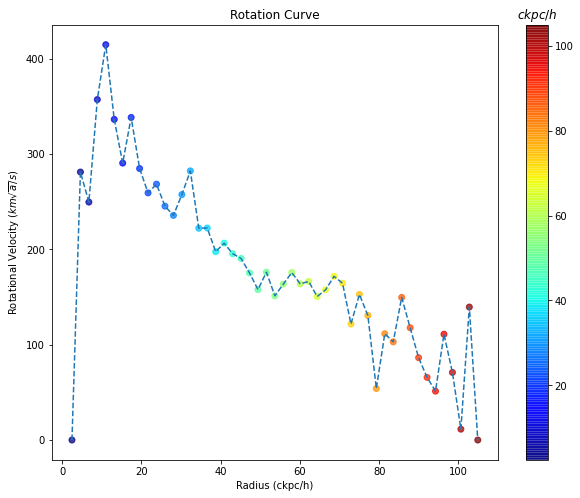

In [62]:
# Plotting Radial Velocity Dispersion vs Radius 

fig = plot.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c = ax.scatter(bins, val, c=bins, cmap='jet', alpha=0.75)
cbar = fig.colorbar(c)
cbar.ax.set_title(r'$ckpc/h$')

ax.set_ylabel(r'Rotational Velocity $(km\sqrt{a}/s)$')
ax.set_xlabel('Radius (ckpc/h)')
ax.set_title('Rotation Curve')

# ax.view_init(45, 45)
plot.plot(bins, val, '--')

plot.show()